## Extracting GWAS Alzheimer's (APOE) Interval
Using GWAS detailed [here](https://pubmed.ncbi.nlm.nih.gov/34493870/)

[Dataset Link](https://www.ebi.ac.uk/gwas/studies/GCST013197)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


LOCUS_PADDING = 100000 # pad locus by this many bp on either side

# read in GWAS data and get significant SNPs
gwas_df = pd.read_csv('gwas_data/GCST013197.tsv',delimiter='\t')
gwas_df[gwas_df['p_value']<1e-100].sort_values(by='p_value').reset_index(drop=True)

# get interval around 
bp_min = gwas_df[gwas_df['p_value']<1e-100].sort_values(by='p_value').reset_index(drop=True)['base_pair_location'].min()-LOCUS_PADDING
bp_max = gwas_df[gwas_df['p_value']<1e-100].sort_values(by='p_value').reset_index(drop=True)['base_pair_location'].max()+LOCUS_PADDING
print(f"locus width: %d bp",bp_max-bp_min)

Text(0.5, 1.0, "Alzheimer's APOE Locus Plot (Chromosome 19)")

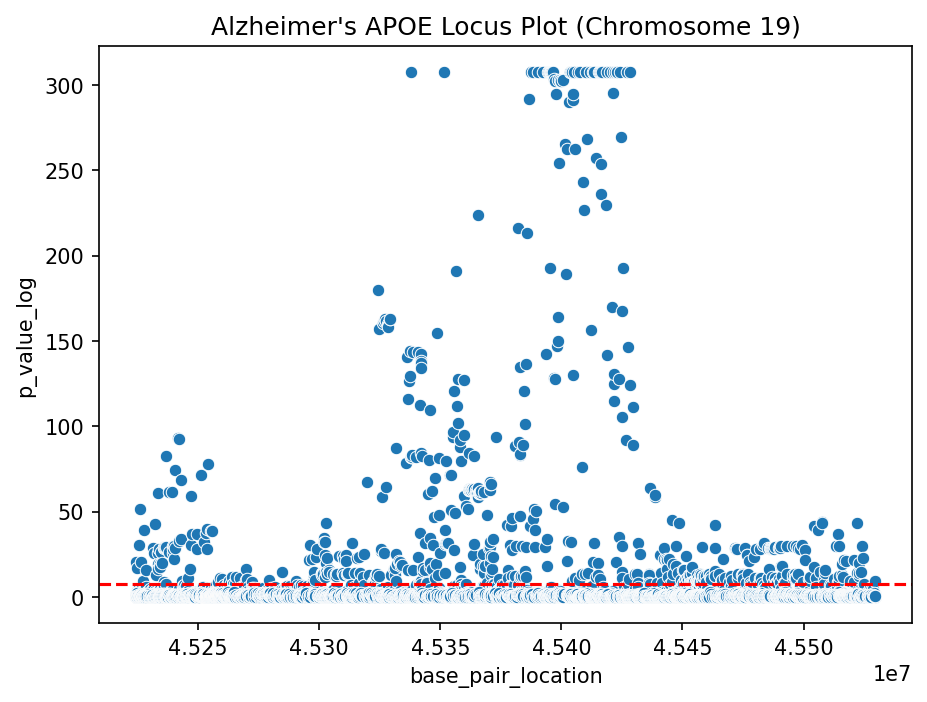

In [ ]:
# Locus plot
gwas_df['p_value_log'] = -np.log10(np.clip(gwas_df['p_value'],np.finfo(float).tiny,None))
fig,ax = plt.subplots(figsize=(7,5),dpi=150)
ax = sns.scatterplot(gwas_df[(gwas_df['base_pair_location']>bp_min)&(gwas_df['base_pair_location']<bp_max)],x='base_pair_location',y='p_value_log',ax=ax)
plt.axhline(-np.log10(5e-8), color="red", linestyle="--")
ax.set_title('Alzheimer\'s APOE Locus Plot (Chromosome 19)' )
